## Le code pour plot les loss

In [16]:
import matplotlib.pyplot as plt
from utils import read_csv
import numpy as np

In [23]:
folder_name = "2_reconstruction_sans_pinns"
epoch = "260"

In [24]:
def plot_loss(file_save, file, title_graph):
    plt.clf()
    csv_train = read_csv(file + "/train_loss.csv")
    csv_test = read_csv(file + "/test_loss.csv")
    train_total = list(csv_train["total"])
    test_total = list(csv_test["total"])

    plt.figure(figsize=(10, 6))
    epochs = np.arange(len(train_total))
    plt.plot(epochs, test_total, label="Test loss", color='red')
    plt.plot(epochs, train_total, label="Training loss", color='blue')

    # Configuration des axes logarithmiques
    plt.yscale("log")

    # Ajout de titres et légendes
    plt.title("Training and test loss", fontsize=16, fontweight='bold')
    plt.xlabel("Epoch",fontsize=14)
    plt.ylabel("Loss (log scale)", fontsize=14)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)

    # Affichage du graphique
    plt.savefig(file_save + "/" + title_graph)


def plot_loss_decompose(file_save, file, title_graph):
    plt.clf()
    csv_train = read_csv(file + "/train_loss.csv")
    train_data = list(csv_train["data"])
    train_pde = list(csv_train["pde"])
    train_border = list(csv_train["border"])

    csv_test = read_csv(file + "/test_loss.csv")
    test_data = list(csv_test["data"])
    test_pde = list(csv_test["pde"])
    test_border = list(csv_test["border"])

    plt.figure(figsize=(10, 6))
    epochs = np.arange(len(train_data))
    plt.plot(epochs, train_pde, label="Loss pde train", color="blue")
    plt.plot(epochs, train_data, label="Loss data train", color="green")
    plt.plot(epochs, train_border, label="Loss border train", color="red")

    plt.plot(epochs, test_pde, label="Loss pde test",
             linestyle="--", color="cyan")
    plt.plot(epochs, test_data, label="Loss data test",
             linestyle="--", color="lime")
    plt.plot(
        epochs, test_border, label="Loss border test", linestyle="--", color="orange"
    )

    # Configuration des axes logarithmiques
    plt.yscale("log")

    # Ajout de titres et légendes
    plt.title("Training and test loss", fontsize=16, fontweight='bold')
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Loss (log scale)", fontsize=14)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)

    # Affichage du graphique
    plt.savefig(file_save + "/" + title_graph)

<Figure size 640x480 with 0 Axes>

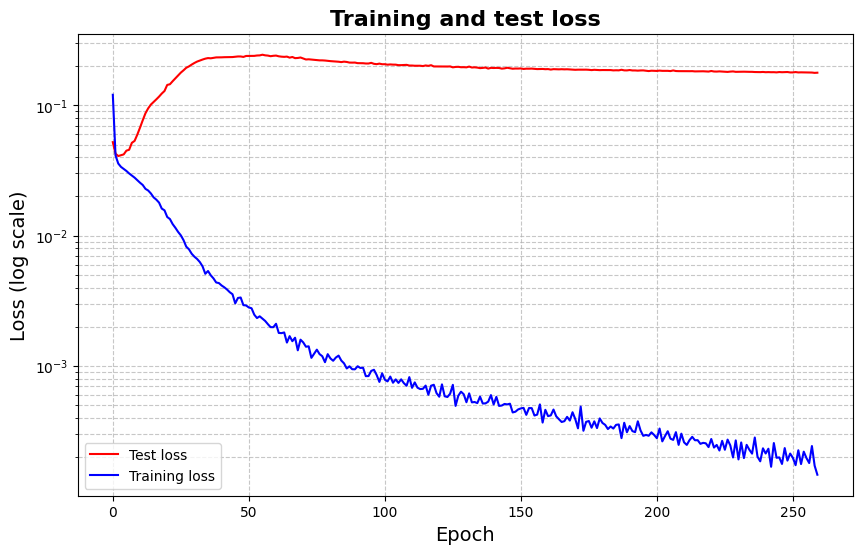

In [25]:
plot_loss('results/'+folder_name, "results/"+folder_name+ f"/epoch{epoch}", 'loss.png')